## BRUTE-FORCE SEARCH

In [4]:
import cv2
import numpy as np

In [5]:
#Brute Force with SIFT

sift = cv2.SIFT_create() #init SIFT detector

In [9]:
print(type('images/img1.png'))

<class 'str'>


In [16]:
# keypoints and descriptors
image1 = cv2.imread('img1.png')
image2 = cv2.imread('img2.png')
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


In [17]:
#matches using k nearest descriptors

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [19]:
# ratio test to threshold the best matches

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [20]:
good

[[< cv2.DMatch 0x7f22365f0b50>],
 [< cv2.DMatch 0x7f22365f0fd0>],
 [< cv2.DMatch 0x7f22365f1090>],
 [< cv2.DMatch 0x7f22365f1e10>],
 [< cv2.DMatch 0x7f22365f2610>],
 [< cv2.DMatch 0x7f22365f2910>],
 [< cv2.DMatch 0x7f22365f3490>],
 [< cv2.DMatch 0x7f22365f3910>],
 [< cv2.DMatch 0x7f22365c8c50>],
 [< cv2.DMatch 0x7f22365c9690>],
 [< cv2.DMatch 0x7f22365c9e90>],
 [< cv2.DMatch 0x7f22365cb010>],
 [< cv2.DMatch 0x7f22365cb710>],
 [< cv2.DMatch 0x7f22365b2150>],
 [< cv2.DMatch 0x7f22365b2c50>],
 [< cv2.DMatch 0x7f22365b3f50>],
 [< cv2.DMatch 0x7f22365bc250>],
 [< cv2.DMatch 0x7f22365bc2d0>],
 [< cv2.DMatch 0x7f22365bccd0>],
 [< cv2.DMatch 0x7f22365bce10>],
 [< cv2.DMatch 0x7f22365bdc50>],
 [< cv2.DMatch 0x7f22365bdc90>],
 [< cv2.DMatch 0x7f22365bdd10>],
 [< cv2.DMatch 0x7f22365be510>],
 [< cv2.DMatch 0x7f22365be650>],
 [< cv2.DMatch 0x7f22365bee50>],
 [< cv2.DMatch 0x7f22365bf590>],
 [< cv2.DMatch 0x7f22365bfe10>],
 [< cv2.DMatch 0x7f22365b6550>]]

In [21]:
# draw the matches

img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

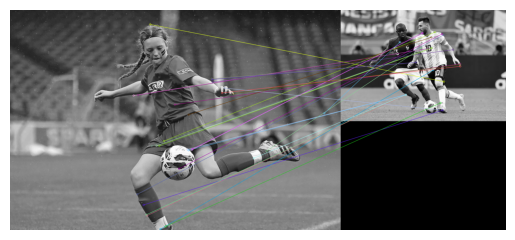

In [24]:
#visualise img3

import matplotlib.pyplot as plt
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3_rgb)
plt.axis('off')
plt.show()

In [25]:
# BF with ORB(binary) descriptors

orb = cv2.ORB_create()

In [26]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # Hamming_distance: a measure of the difference between two strings of equal length


In [28]:
matches = bf.match(des1, des2)

In [29]:
matches = sorted(matches, key=lambda x: x.distance) # sorting matches

In [32]:
img3 = cv2.drawMatches(
    img1,
    kp1,
    img2,
    kp2,
    matches[:10],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

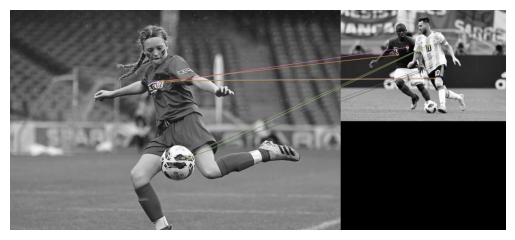

In [33]:
#visualise img3

img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3_rgb)
plt.axis('off')
plt.show()

### Fast Library for Approximate Nearest Neighbors(FLANN)

In [34]:
# specify the algorithm in a dictionary
# SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

In [35]:
# ORB - Oriented FAST and Rotated BRIEF

FLANN_INDEX_LSH = 6
index_params = dict(
    algorithm=FLANN_INDEX_LSH, table_number=12, key_size=20, multi_probe_level=2
)

In [36]:
search_params = dict(checks=50) #max leafs 

In [37]:
sift = cv2.SIFT_create()

In [38]:
image1 = cv2.imread('img3.png')
image2 = cv2.imread('img4.png')

img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [39]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [40]:
# FLANN Parameters

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

In [41]:
# mask to draw only good matches
matchesMask = [[0, 0] for i in range(len(matches))]

# ratio test
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

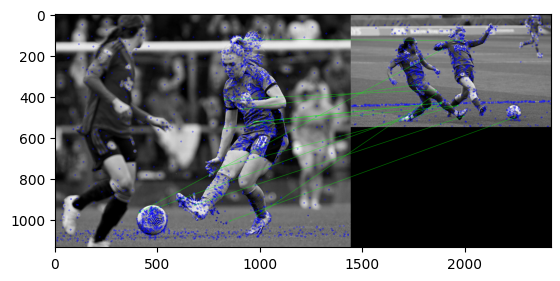

In [43]:
# visualise images

draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=cv2.DrawMatchesFlags_DEFAULT,
)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3_rgb)
# plt.axis('off')
plt.show()

## LoFTR: Local Feature Matching with Transformers

In [47]:
# !pip3 install kornia kornia-rs kornia_moons 

In [53]:
import kornia as K
import kornia.feature as KF
import torch
from kornia_moons.viz import draw_LAF_matches
from kornia.feature import LoFTR


In [72]:
# resizing images

img1 = K.io.load_image('img3.png', K.io.ImageLoadType.RGB32)[None, ...]
img2 = K.io.load_image('img1.png', K.io.ImageLoadType.RGB32)[None, ...]

img1 = K.geometry.resize(img1, (512, 512), antialias=True)
img2 = K.geometry.resize(img2, (512, 512), antialias=True)

In [57]:
# identify whehter image is indoor or outdoor

matcher = LoFTR(pretrained="outdoor")

Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /home/anson/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100%|██████████| 44.2M/44.2M [00:14<00:00, 3.26MB/s]


In [73]:
# convert to grayscale
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1),
    "image1": K.color.rgb_to_grayscale(img2),
}

In [74]:
# inference
with torch.inference_mode():
    correspondences = matcher(input_dict)

In [75]:
# Clean up the correspondences using Random Sample Consensus (RANSAC). This helps to deal with noise or outliers in the data.

mkpts0 = correspondences["keypoints0"].cpu().numpy()
mkpts1 = correspondences["keypoints1"].cpu().numpy()
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0

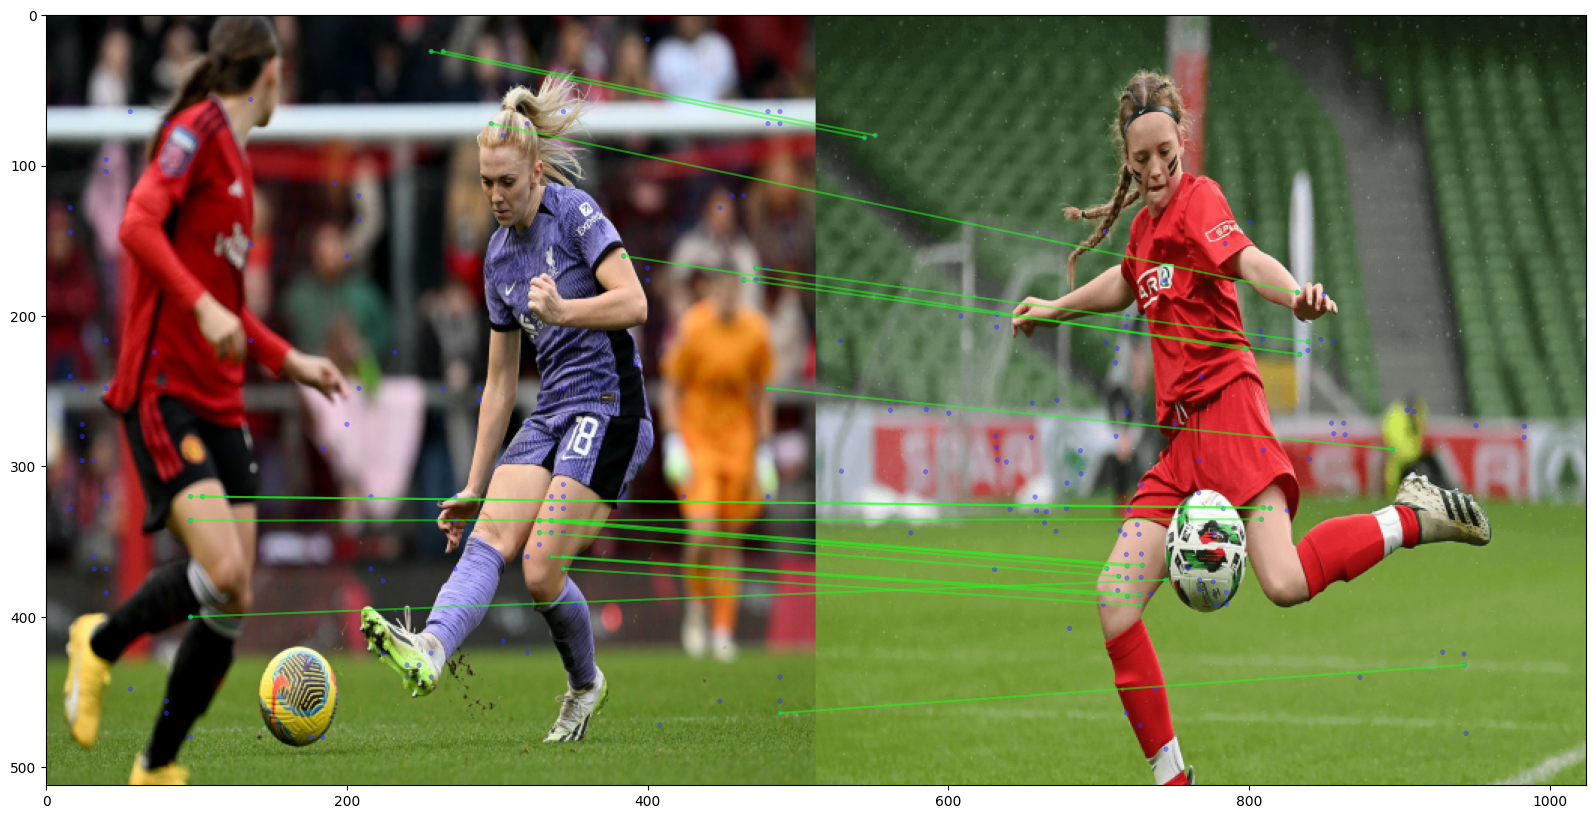

In [76]:
# vusualise
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0).view(1, -1, 2),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1).view(1, -1, 2),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1),
    ),
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers,
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)